In [1]:
from imports import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings("ignore")


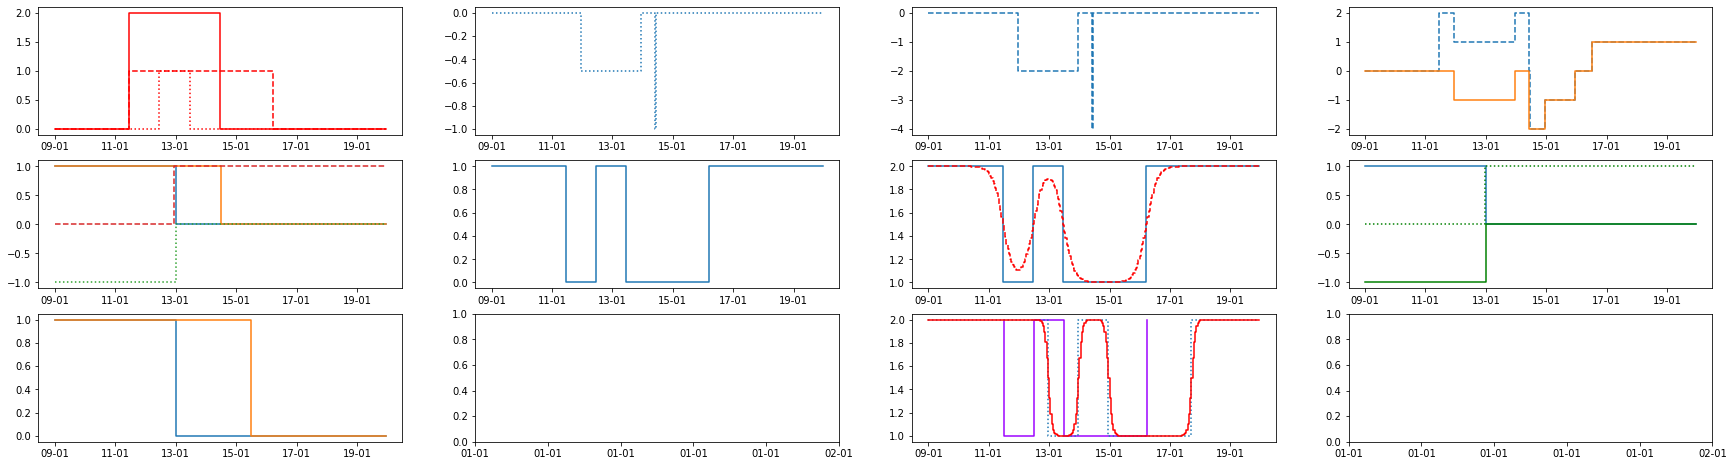

In [2]:
t = np.arange(datetime(2020,1,9),datetime(2020,1,20),timedelta(hours=1)).astype(datetime)
fig, (axr1,axr2,axr3) = plt.subplots(ncols = 4, nrows=3, figsize=(30,8))

s1d = Step(start=datetime(2020,1,14,10,15),end=datetime(2020,1,16,12,1),weight=-2,use_datetime=True)

s2d = Step(start=datetime(2020,1,12),weight=-1)
s3d = Step(end=datetime(2020,1,13))
s4d = Step(start=datetime(2020,1,14),end=datetime(2020,1,16,12,1))
s5d = Step(start=datetime(2020,1,15))
s6d = Step(start=datetime(2020,1,16))

s7d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)
s8d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)
s9d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)

s8d = Step(start=datetime(2020,1,12,12,0),end=datetime(2020,1,13,12,0))
s9d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,16,6))

std = Steps(use_datetime=True).add([s1d,s2d,s4d,s5d,s6d])
std2 = Steps(use_datetime=True).add([s8d])



axr1[0].step(t,s7d(t),color='r')
#s7d.plot(ax=axr1[0])
axr1[0].step(t,s8d(t),color='r',linestyle=':')
axr1[0].step(t,s9d(t),color='r',linestyle='--')

axr1[1].step(t,((std/s7d))(t),linestyle=':')
axr2[1].step(t,(std2-s9d+Step(use_datetime=True))(t))

axr1[2].step(t,((std*s7d))(t),linestyle='--')

axr1[3].step(t,(std+s7d)(t),linestyle='--')
#axr2[0].step(t,(std2-s9d)(t))
axr1[3].step(t,std(t))

axr2[2].step(t,(std2-s9d+2)(t))
axr2[2].step(t,(std2-s9d+2).smooth_step(t,smooth_factor=30000),color='r',linestyle='--')

axr2[0].step(t,s3d(t))
axr2[0].step(t,(s3d>>pd.Timedelta(days=1.5))(t))
axr2[0].step(t,(s3d.reflect())(t),linestyle=':')
axr2[0].step(t,(s3d.reflect(axis=1))(t),linestyle='--')

#axr2[3].step(t,s7d(t))
#axr2[3].step(t,(s7d.reflect())(t),color='r')
#axr2[3].step(t,(s7d.reflect(axis=1))(t),color='r',linestyle=':')

axr2[3].step(t,s3d(t))
axr2[3].step(t,(s3d.reflect())(t),color='g')
axr2[3].step(t,(s3d.reflect(axis=1))(t),color='g',linestyle=':')

smulti = std2-s9d+2

smulti.plot(ax=axr3[2])
axr3[2].step(t,(smulti>>pd.Timedelta(days=1.5))(t),linestyle=':')
axr3[2].step(t,(smulti>>pd.Timedelta(days=1.5)).smooth_step(t,smooth_factor=10000),color='r')
#(smulti<2).plot(ax=axr3[2],color='r')

axr3[0].step(t,s3d(t))
axr3[0].step(t,(s3d>>pd.Timedelta(days=2.5))(t))
#s3d.plot(ax=axr3[0])
#(s3d>>pd.Timedelta(days=2.5)).plot(ax=axr3[0],color='r')

date_form = DateFormatter('%d-%m')
axr1[0].xaxis.set_major_formatter(date_form)
axr1[1].xaxis.set_major_formatter(date_form)
axr1[2].xaxis.set_major_formatter(date_form)
axr1[3].xaxis.set_major_formatter(date_form)

axr2[0].xaxis.set_major_formatter(date_form)
axr2[1].xaxis.set_major_formatter(date_form)
axr2[2].xaxis.set_major_formatter(date_form)
axr2[3].xaxis.set_major_formatter(date_form)

axr3[0].xaxis.set_major_formatter(date_form)
axr3[1].xaxis.set_major_formatter(date_form)
axr3[2].xaxis.set_major_formatter(date_form)
axr3[3].xaxis.set_major_formatter(date_form)



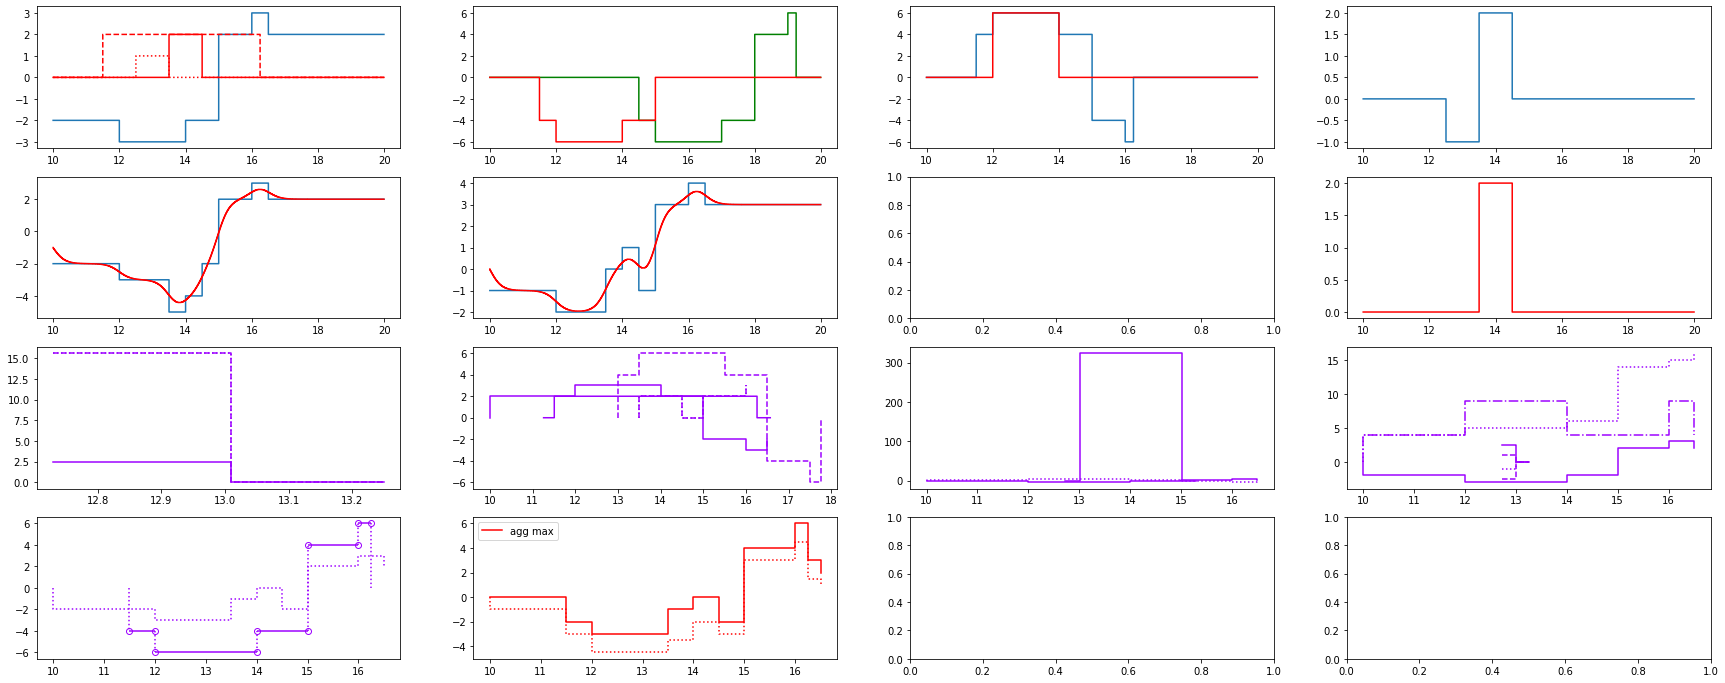

In [3]:
t = np.arange(10,20,0.01)
fig, (axr1,axr2,axr3,axr4) = plt.subplots(ncols = 4, nrows=4, figsize=(30,12))

s1 = Step(start=10,end=15,weight=-2)
s2 = Step(start=12,weight=-1)
s3 = Step(end=13,weight=2.5)
s4 = Step(start=14,end=16.5)
s5 = Step(start=15,weight=2)
s6 = Step(start=16)

s7 = Step(start=13.5,end=14.5,weight=2)
s8 = Step(start=12.5,end=13.5)
s9 = Step(start=11.5,end=16.25,weight=2)

st = Steps().add([s1,s2,s4,s5,s6])
st2 = Steps().add([s7])


axr1[0].step(t,st(t))
axr1[0].step(t,s7(t),color='r')
axr1[0].step(t,s8(t),color='r',linestyle=':')
axr1[0].step(t,s9(t),color='r',linestyle='--')
axr1[1].step(t,((st*s9)>>3)(t),color='g')
axr1[1].step(t,(((st*s9)<-2))(t),color='r')

sst9 = (st*s9).reflect()
axr1[2].step(t,sst9(t))
axr1[2].step(t,(sst9>4)(t),color='r')
#axr2[2].step(t,(((st*s9)>-0.5))(t),color='r',linestyle=':')

axr1[3].step(t,(st2-s8)(t))
axr2[3].step(t,((st2-s8)>-0.5)(t),color='r')

axr2[0].step(t,(st-st2)(t))
axr2[0].step(t,(st-st2).smooth_step(t,smooth_factor=0.35),color='r')

axr2[1].step(t,(st+st2+1)(t))
axr2[1].step(t,(st+st2+Step()).smooth_step(t,smooth_factor=0.35),color='r')


(st-s8).plot(ax=axr3[2])
(st-s8).reflect().plot(ax=axr3[2],linestyle=':')

s3.plot(ax=axr3[3])
s3.normalise().plot(ax=axr3[3],linestyle='--')

s3.reflect().plot(ax=axr3[3],linestyle='--')
s3.reflect().normalise().plot(ax=axr3[3],linestyle=':')


s3.plot(ax=axr3[0])
(s3**3).plot(ax=axr3[0],linestyle='--')
(s3*s3*s3).plot(ax=axr3[0],linestyle=':')

st.reflect().plot(ax=axr3[1])
s9.plot(ax=axr3[1])
((st.reflect()*s9)>>1.5).plot(ax=axr3[1],linestyle='--')

(st2+s5+s6).plot(ax=axr3[1],linestyle='--')
(st2+s5+s6).plot(ax=axr3[1],linestyle=':')


((s1*3*((s1*1.5)>>3))**2).plot(ax=axr3[2])
st.plot(ax=axr3[3])
((st**2)).plot(ax=axr3[3],linestyle=':')
((st*st)).plot(ax=axr3[3],linestyle='-.')

comp1 = st+st2
comp2 = st*s9

agg_st = Steps.aggregate([comp1,comp2],np.max)
agg_st2 = Steps.aggregate([comp1,comp2],np.mean)

comp1.plot(ax=axr4[0],linestyle=':')
comp2.plot(ax=axr4[0],method='pretty')
agg_st.plot(ax=axr4[1],color='r',label='agg max')
agg_st2.plot(ax=axr4[1],color='r',linestyle=':')

axr4[1].legend()


<AxesSubplot:>

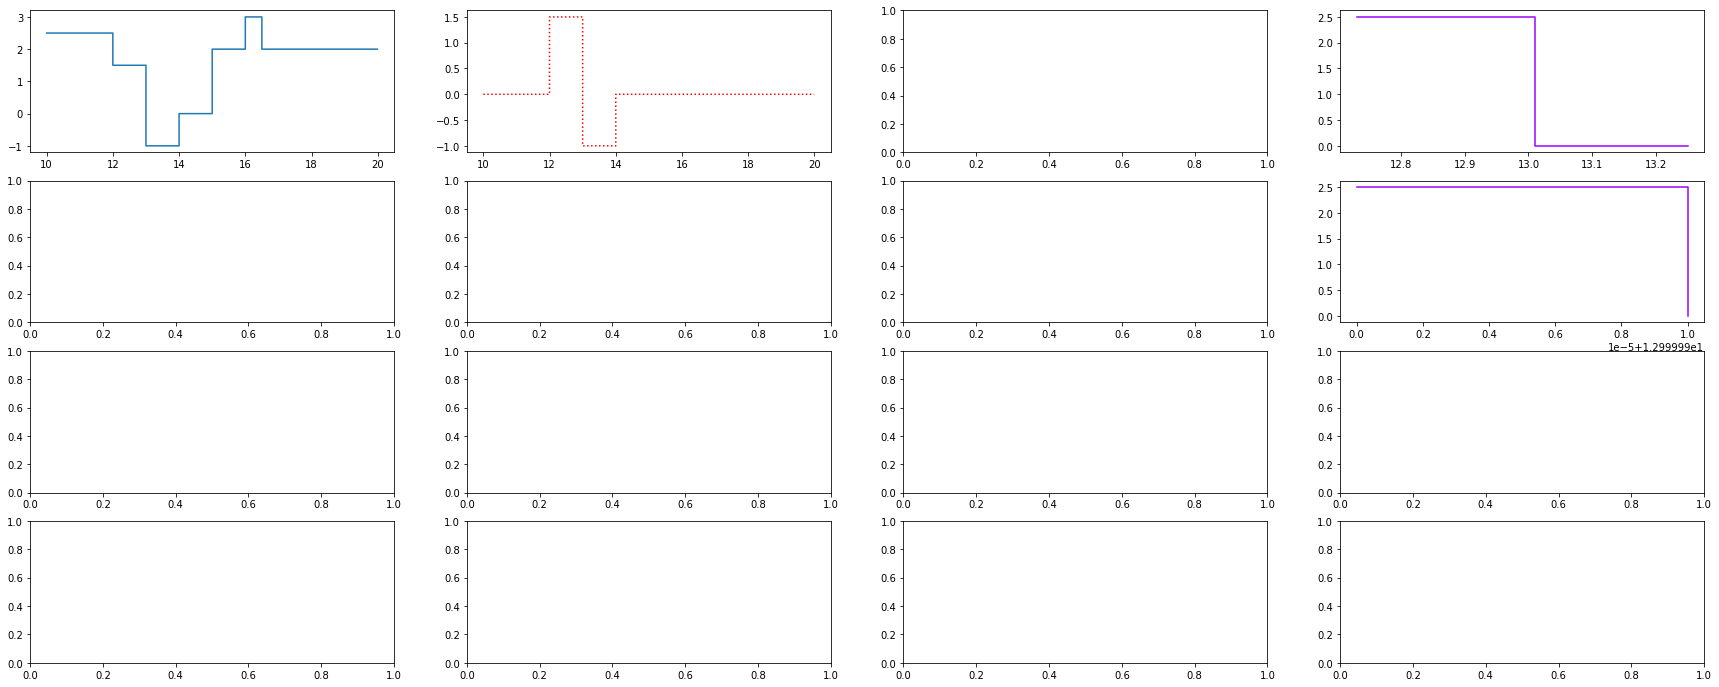

In [8]:
t = np.arange(10,20,0.01)
fig, (axr1,axr2,axr3,axr4) = plt.subplots(ncols = 4, nrows=4, figsize=(30,12))

# agg_st_dict = agg_st.to_dict(False)
# agg_st_dict_cum = agg_st.to_dict()
# #print(agg_st_dict_cum)

# filtered_dict = {k: (v if v > 1 else 0) for k,v in agg_st_dict_cum.items()}
# #print(filtered_dict)
# agg_st_filtered = Steps.read_dict(filtered_dict)

s3a = Step(weight=2.5) + Step(start=13,weight=-2.5)

#print(agg_st_filtered)
st3 = Steps().add([s2,s4,s5,s6]) + s3a
axr1[0].step(t,st3(t))
axr1[1].step(t,(st3<=1.5)(t),linestyle=':',color='r')

# for s in st3:
#     s.plot(ax=axr1[2])
#(st3>0.5).plot(linestyle=':')

s3.plot(ax=axr1[3])


s3a.plot(ax=axr2[3])
# s1 = Step(start=10,end=15,weight=-2)
# s2 = Step(start=12,weight=-1)
# s3 = Step(end=13,weight=2.5)
# s4 = Step(start=14,end=16.5)
# s5 = Step(start=15,weight=2)
# s6 = Step(start=16)

# s7 = Step(start=13.5,end=14.5,weight=2)
# s8 = Step(start=12.5,end=13.5)
# s9 = Step(start=11.5,end=16.25,weight=2)

In [5]:
from itertools import groupby
#from operator import itemgetter

all_keys = np.array([s.start() for s in st3._steps])
#all_keys = np.sort(np.append(all_keys,[10]))
all_values = st3(all_keys)

k = np.where(all_values > 0,True,False)

groups = [(group[0],group[-1]) for group in (list(group) for key, group in groupby(range(len(k)), key=k.__getitem__) if key)]

In [6]:
filtered = np.array([])

for s,e in groups:
    filtered = np.append(filtered,st3._steps[s:e])
    print(all_values[s],all_values[e])
    print(st3._steps[s:e])

st3_filtered = Steps().add(filtered)

2.5 1.5
[-inf:2.5]
2.0 2.0
[15:2 16:1]
